In [1]:
# Listing 3.1 - All-ones or all-zeros tensors
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
# Listing 3.2 - Random Tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.99448776]
 [ 0.78066355]
 [ 1.0701759 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.14077485]
 [0.61849415]
 [0.08095479]], shape=(3, 1), dtype=float32)


In [3]:
# Listing 3.3 - NumPy arrays are assignable 
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [4]:
# Listing 3.4 - TensorFlow tensors are not assignable -- This will fail, as a tensor isn't assignable
#x = tf.ones(shape=(2, 2))
#x[0, 0] = 0.

In [5]:
# Listing 3.5 - Creating a TensorFlow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.22179143],
       [0.57991004],
       [0.65214425]], dtype=float32)>


In [6]:
# Listing 3.6 - Assigning a value to a TensorFlow variable
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
# Listing 3.7 - Assigning a value to a subset of a tensorFlow variable
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
# Listing 3.8 - Using assign_add()
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [9]:
# Listing 3.9 - A few basic math operations 
a = tf.ones((2, 2,))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e += d

In [10]:
# Listing 3.10 - Using the GradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [11]:
# Listing 3.11 - Using GradientTape with constant tensor inputs
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_var)
gradient = tape.gradient(result, input_const)
print(gradient)

None


In [12]:
# Listing 3.12 - Using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


Basic set up for linear classifier (probably asked during ML job interviews)

In [13]:
# Listing 3.13 - Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], 
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], 
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [14]:
# Listing 3.14 - Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [15]:
# Listing 3.15 Generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                     np.ones((num_samples_per_class, 1), dtype="float32")))

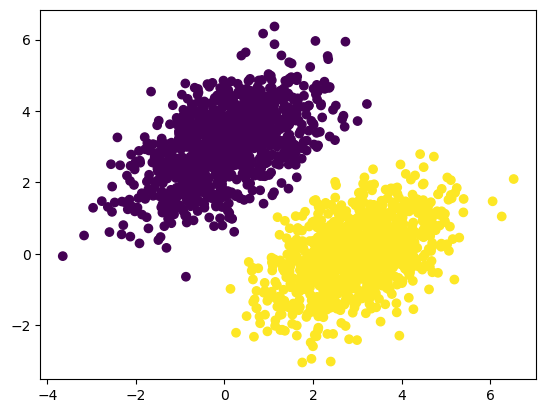

In [16]:
# Listing 3.16 - Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [17]:
# Listing 3.17 Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
# Listing 3.18 - The forward pass function 
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
# Listing 3.19 - The mean squared error loss function 
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
# Listing 3.20 - The training step function 
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:                # Forward pass, inside a gradient, tape score
        predictions = model(inputs)                # Forward pass, inside a gradient, tape score
        loss = square_loss(targets, predictions)   # Forward pass, inside a gradient, tape score
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # Retrieve the gradient of the loss with regard to weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # Update the weights
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # Update the weights
    return loss

Loss at step 0: 2.4170
Loss at step 1: 0.4091
Loss at step 2: 0.1628
Loss at step 3: 0.1232
Loss at step 4: 0.1110
Loss at step 5: 0.1031
Loss at step 6: 0.0962
Loss at step 7: 0.0900
Loss at step 8: 0.0844
Loss at step 9: 0.0792
Loss at step 10: 0.0745
Loss at step 11: 0.0701
Loss at step 12: 0.0662
Loss at step 13: 0.0626
Loss at step 14: 0.0593
Loss at step 15: 0.0563
Loss at step 16: 0.0535
Loss at step 17: 0.0510
Loss at step 18: 0.0487
Loss at step 19: 0.0467
Loss at step 20: 0.0447
Loss at step 21: 0.0430
Loss at step 22: 0.0414
Loss at step 23: 0.0399
Loss at step 24: 0.0386
Loss at step 25: 0.0374
Loss at step 26: 0.0363
Loss at step 27: 0.0353
Loss at step 28: 0.0343
Loss at step 29: 0.0335
Loss at step 30: 0.0327
Loss at step 31: 0.0320
Loss at step 32: 0.0314
Loss at step 33: 0.0308
Loss at step 34: 0.0302
Loss at step 35: 0.0297
Loss at step 36: 0.0293
Loss at step 37: 0.0289
Loss at step 38: 0.0285
Loss at step 39: 0.0282


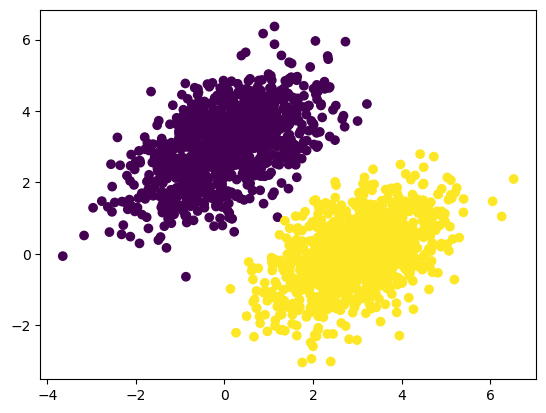

In [21]:
# Listing 3.21 - The batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

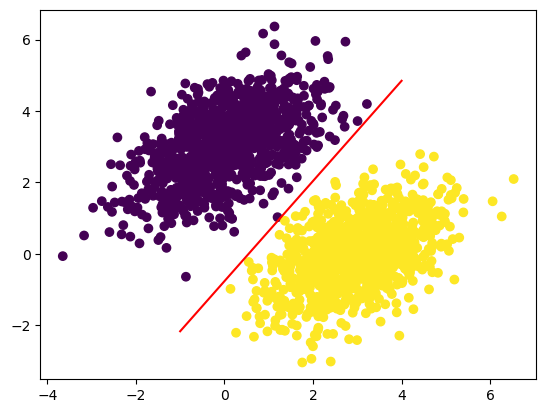

In [22]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [24]:
# Listing 3.22 - A Dense layer implemented as a Layer subclass
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # All Keras layers inherit from the base Layer class
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation 
    
    def build(self, input_shape): # Weight creation takes place in the build() method
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")
        """add_weight() is a shortcut method for creating weights. It is also possible to create standalone variables
        and assign them as layer attributes, like self.W = tf.Variable(tf.random.uniform(w_shape))."""
    
    def call(self, inputs): # We define the forward pass computation in the call() method
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu) # instantiate our layer, defined previously
input_tensor = tf.ones(shape=(2, 784))                  # create some test inputs
output_tensor = my_dense(input_tensor)                  # call the layer on the inputs, just like a function
print(output_tensor.shape)

(2, 32)


In [25]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')
layer

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

model = keras.Sequential([keras.layers.Dense(1)])  # define a linear classifier
model.compile(optimizer="rmsprop",                 # specify the optimizer by name
              loss="mean_squared_error",           # specify the loss by name: mean Squared error
              metrics=("accuracy"))                # specify a list of metrics: in this case, only accuracy

In [31]:
# Listing 3.23 - Calling fit() with NumPy data
history = model.fit(
    inputs,             # the input exmples, as a NumPy array
    targets,            # the corresponding training targets, as a NumPy array
    epochs=5,           # the training loop will iterate over the data 5 times
    batch_size=128)     # the training loop will iterate over the data in batch sizes of 128 examples

history.history

Epoch 1/5
16/16 [==============================] - 0s 694us/step - loss: 11.4500 - accuracy: 0.0015
Epoch 2/5
16/16 [==============================] - 0s 519us/step - loss: 11.1177 - accuracy: 0.0025
Epoch 3/5
16/16 [==============================] - 0s 561us/step - loss: 10.7895 - accuracy: 0.0025
Epoch 4/5
16/16 [==============================] - 0s 507us/step - loss: 10.4668 - accuracy: 0.0025
Epoch 5/5
16/16 [==============================] - 0s 460us/step - loss: 10.1491 - accuracy: 0.0025


{'loss': [11.449958801269531,
  11.117717742919922,
  10.789453506469727,
  10.466758728027344,
  10.149129867553711],
 'accuracy': [0.001500000013038516,
  0.0024999999441206455,
  0.0024999999441206455,
  0.0024999999441206455,
  0.0024999999441206455]}

In [33]:
# Listing 3.24 - Using the validation-data argument
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
             loss=keras.losses.MeanSquaredError(),
             metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 1ms/step - loss: 0.1169 - binary_accuracy: 0.9621 - val_loss: 0.0450 - val_binary_accuracy: 0.9917
Epoch 2/5
88/88 [==============================] - 0s 590us/step - loss: 0.0727 - binary_accuracy: 0.9629 - val_loss: 0.0423 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 568us/step - loss: 0.0688 - binary_accuracy: 0.9693 - val_loss: 0.0697 - val_binary_accuracy: 0.9617
Epoch 4/5
88/88 [==============================] - 0s 548us/step - loss: 0.0685 - binary_accuracy: 0.9586 - val_loss: 0.0657 - val_binary_accuracy: 0.9883
Epoch 5/5
88/88 [==============================] - 0s 559us/step - loss: 0.0695 - binary_accuracy: 0.9571 - val_loss: 0.0265 - val_binary_accuracy: 1.0000


In [34]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 747us/step - loss: 0.0265 - binary_accuracy: 1.0000


In [37]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 646us/step
[[ 0.21336782]
 [ 1.0346793 ]
 [ 0.94344336]
 [ 0.78346574]
 [ 0.15701097]
 [ 1.126884  ]
 [ 0.23927861]
 [-0.14146703]
 [ 1.1874591 ]
 [ 1.0271561 ]]
